In [1]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


a)

In [2]:
data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])
x_bar = data.mean()
print(f"Sample mean = {x_bar:.2f}, Sample std = {data.std(ddof=1):.2f}")

Sample mean = 58.00, Sample std = 2.00


b)

In [3]:
with pm.Model() as weak_model:
    mu = pm.Normal("mu", mu=x_bar, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    
    trace_weak = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
    summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)

print("\nPosterior summaries (Weak Prior):")
print(summary_weak)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


C:\Users\claud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\
Python312\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 37 seconds.



Posterior summaries (Weak Prior):
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.003  0.755    56.518     59.567      0.013    0.013    3340.0   
sigma   2.333  0.662     1.305      3.620      0.011    0.014    4438.0   

       ess_tail  r_hat  
mu       3523.0    1.0  
sigma    4661.0    1.0  


c)

In [4]:
print("\nFrequentist estimates:")
print(f"Mean: {np.mean(data):.2f}")
print(f"SD:   {np.std(data, ddof=1):.2f}")


Frequentist estimates:
Mean: 58.00
SD:   2.00


d)

In [7]:
with pm.Model() as strong_model:
    mu = pm.Normal("mu", mu=50, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    
    trace_strong = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
    summary_strong = az.summary(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)

print("\nPosterior summaries (Strong Prior):")
print(summary_strong)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


C:\Users\claud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\
Python312\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 37 seconds.



Posterior summaries (Strong Prior):
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     57.957  0.762    56.471     59.481      0.012    0.014    3980.0   
sigma   2.338  0.668     1.321      3.683      0.011    0.017    4348.0   

       ess_tail  r_hat  
mu       3581.0    1.0  
sigma    3710.0    1.0  


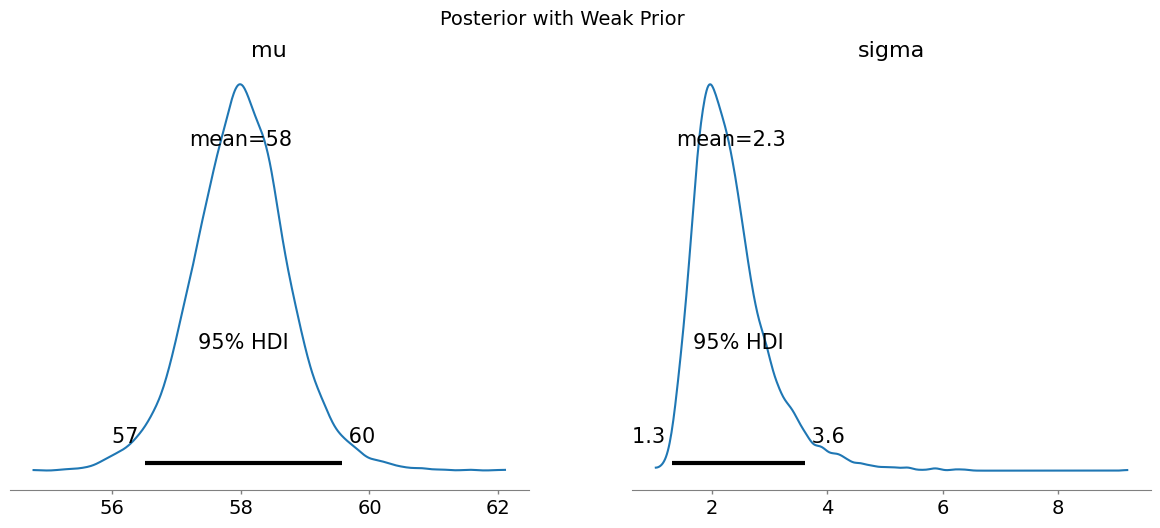

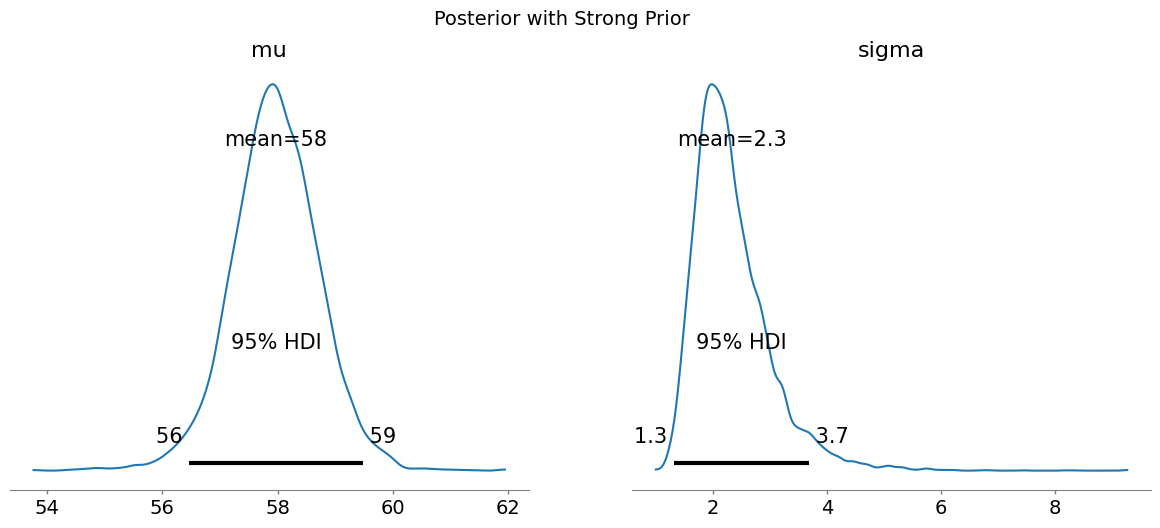

In [8]:
az.plot_posterior(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Weak Prior", fontsize=14)
plt.show()

az.plot_posterior(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Strong Prior", fontsize=14)
plt.show()